<a href="https://colab.research.google.com/github/RodicaCIA/product-category-predictor/blob/main/proiectfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coloane disponibile: ['product ID', 'Product Title', 'Merchant ID', 'Category Label', '_Product Code', 'Number_of_Views', 'Merchant Rating', 'Listing Date']

Primele rânduri:


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024



🔹 Antrenare model: Logistic Regression
Acuratețe: 0.9528
                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        17
            CPUs       0.98      1.00      0.99       749
 Digital Cameras       0.99      0.99      0.99       538
     Dishwashers       0.93      0.96      0.94       681
        Freezers       0.99      0.93      0.96       440
 Fridge Freezers       0.93      0.94      0.94      1094
         Fridges       0.87      0.89      0.88       687
      Microwaves       0.99      0.96      0.98       466
    Mobile Phone       0.00      0.00      0.00        11
   Mobile Phones       0.95      1.00      0.97       801
             TVs       0.99      0.99      0.99       708
Washing Machines       0.96      0.95      0.95       803
          fridge       0.00      0.00      0.00        25

        accuracy                           0.95      7020
       macro avg       0.74      0.74      0.74      7020
    weighted

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Acuratețe: 0.9457
                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        17
            CPUs       0.97      0.99      0.98       749
 Digital Cameras       1.00      0.99      0.99       538
     Dishwashers       0.91      0.96      0.94       681
        Freezers       0.97      0.92      0.95       440
 Fridge Freezers       0.91      0.94      0.93      1094
         Fridges       0.89      0.87      0.88       687
      Microwaves       0.97      0.97      0.97       466
    Mobile Phone       0.00      0.00      0.00        11
   Mobile Phones       0.96      0.98      0.97       801
             TVs       0.98      0.98      0.98       708
Washing Machines       0.96      0.93      0.94       803
          fridge       0.00      0.00      0.00        25

        accuracy                           0.95      7020
       macro avg       0.73      0.73      0.73      7020
    weighted avg       0.94      0.95      0.94     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


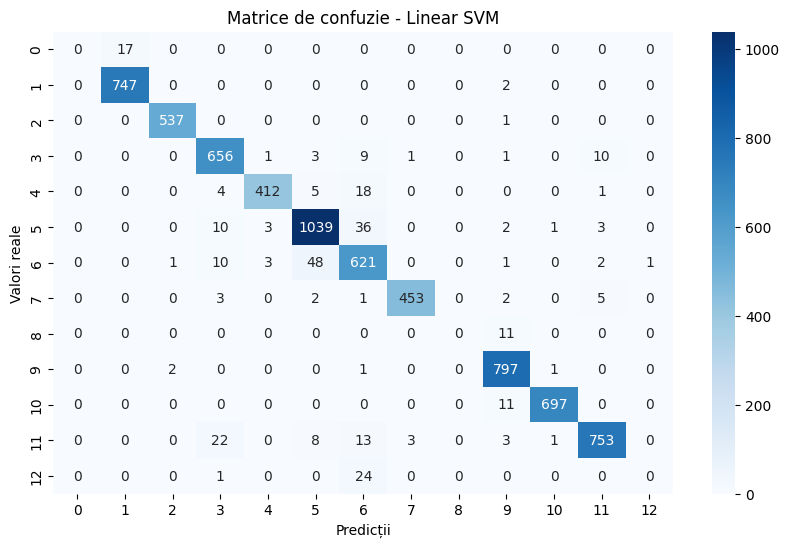


✅ Modelele au fost salvate cu succes: product_category_model.pkl și tfidf_vectorizer.pkl

🔮 Exemple de testare:
iphone 7 32gb gold,4,3,Apple iPhone 7 32GB ➡️ Mobile Phones
olympus e m10 mark iii geh use silber ➡️ Digital Cameras
kenwood k20mss15 solo ➡️ Microwaves
bosch wap28390gb 8kg 1400 spin ➡️ Washing Machines
bosch serie 4 kgv39vl31g ➡️ Fridge Freezers
smeg sbs8004po ➡️ Fridges


In [3]:
# =============================
# TASK 3 - Clasificarea produselor după titlu
# =============================

# 1️⃣ Importuri
import pandas as pd
import pandas as pd

# load dataset from GitHub
url = "https://raw.githubusercontent.com/RodicaCIA/product-category-predictor/main/data/IMLP4_TASK_03-products.csv"
df = pd.read_csv(url)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# 2️⃣ Încărcare date
df = pd.read_csv("IMLP4_TASK_03-products.csv")

# Curățăm numele coloanelor (elimină spațiile înainte/după)
df.columns = df.columns.str.strip()

# 3️⃣ Explorare rapidă
print("Coloane disponibile:", df.columns.tolist())
print("\nPrimele rânduri:")
display(df.head(3))

# 4️⃣ Curățare și selecție coloane utile
df = df[['Product Title', 'Category Label']].dropna()
df['Product Title'] = df['Product Title'].astype(str).str.lower()

# 5️⃣ Împărțire în train/test
X_train, X_test, y_train, y_test = train_test_split(
    df['Product Title'], df['Category Label'],
    test_size=0.2, random_state=42, stratify=df['Category Label']
)

# 6️⃣ Vectorizare text TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 7️⃣ Definim mai multe modele pentru comparație
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42),
    "Linear SVM": LinearSVC()
}

results = {}

# 8️⃣ Antrenare + evaluare
for name, model in models.items():
    print(f"\n🔹 Antrenare model: {name}")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Acuratețe: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# 9️⃣ Afișăm comparația acurateței
print("\n📊 Rezumat performanțe:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

best_model_name = max(results, key=results.get)
print(f"\n🏆 Cel mai bun model: {best_model_name} ({results[best_model_name]:.4f})")

best_model = models[best_model_name]

# 10️⃣ Matrice de confuzie
y_pred_best = best_model.predict(X_test_tfidf)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title(f"Matrice de confuzie - {best_model_name}")
plt.xlabel("Predicții")
plt.ylabel("Valori reale")
plt.show()

# 11️⃣ Salvăm modelul și vectorizatorul
with open("product_category_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("\n✅ Modelele au fost salvate cu succes: product_category_model.pkl și tfidf_vectorizer.pkl")

# 12️⃣ Test interactiv
def predict_category(title):
    title = title.lower()
    vector = vectorizer.transform([title])
    return best_model.predict(vector)[0]

# Exemple de testare
print("\n🔮 Exemple de testare:")
examples = [
    "iphone 7 32gb gold,4,3,Apple iPhone 7 32GB",
    "olympus e m10 mark iii geh use silber",
    "kenwood k20mss15 solo",
    "bosch wap28390gb 8kg 1400 spin",
    "bosch serie 4 kgv39vl31g",
    "smeg sbs8004po"
]

for e in examples:
    print(f"{e} ➡️ {predict_category(e)}")


Pregătirea mediului și încărcarea datelor